In [1]:
import pandas as pd
import numpy as np
import urllib.request
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library
import json
#!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [2]:
print(soup.prettify() )

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bd5fc6b3-c52c-45b5-8c6a-5514e830e16c","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":979555370,"wgRevisionId":979555370,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communicati

In [3]:
all_tables=soup.find_all("table")

In [4]:
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B

In [5]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

In [6]:
trs = right_table.find_all('tr')

In [7]:
rows = list()
for tr in trs:
    td = tr.find_all('td')
    row = [ele.text.strip() for ele in td]
    if row:
        # Ignore empty rows with no 'td',
        # applicable for the column headers row.
        rows.append(row)

In [8]:
rows

[['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Regent Park, Harbourfront'],
 ['M6A', 'North York', 'Lawrence Manor, Lawrence Heights'],
 ['M7A', 'Downtown Toronto', "Queen's Park, Ontario Provincial Government"],
 ['M8A', 'Not assigned', 'Not assigned'],
 ['M9A', 'Etobicoke', 'Islington Avenue, Humber Valley Village'],
 ['M1B', 'Scarborough', 'Malvern, Rouge'],
 ['M2B', 'Not assigned', 'Not assigned'],
 ['M3B', 'North York', 'Don Mills'],
 ['M4B', 'East York', 'Parkview Hill, Woodbine Gardens'],
 ['M5B', 'Downtown Toronto', 'Garden District, Ryerson'],
 ['M6B', 'North York', 'Glencairn'],
 ['M7B', 'Not assigned', 'Not assigned'],
 ['M8B', 'Not assigned', 'Not assigned'],
 ['M9B',
  'Etobicoke',
  'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale'],
 ['M1C', 'Scarborough', 'Rouge Hill, Port Union, Highland Creek'],
 ['M

In [9]:
df=pd.DataFrame(rows,columns=['postalcode','borough','neighbourhood'])

In [10]:
df.head()

,postalcode,borough,neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [11]:
df.shape

(180, 3)

In [12]:
df1=df[df.borough!='Not assigned']

In [13]:
df1.head()

,postalcode,borough,neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [14]:
df1['neighbourhood'] = df1.apply(
    lambda row: 
    row['Borough'] if row['neighbourhood'] == 'Not assigned' 
    else row['neighbourhood'],
    axis=1)
print("Dataframe shape: ", df1.shape)

Dataframe shape:  (103, 3)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:

df1 = df1.groupby(['postalcode', 'borough'])['neighbourhood'].\
    apply(', '.join).to_frame()
df1.reset_index(inplace=True)

In [16]:
df1

,postalcode,borough,neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [17]:
df2=pd.read_csv('http://cocl.us/Geospatial_data')

In [18]:
df2.shape

(103, 3)

In [19]:
df3=pd.concat([df1, df2], axis=1, sort=False)
# merging two DataFrames 

In [20]:
df3.head()

,postalcode,borough,neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [21]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [22]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'AGF2Q3KUMROMMCPR3VKROA2ETWWPUPJN34URCA0GZIB5X3ES' # your Foursquare ID
    CLIENT_SECRET = 'S1UXOQXCG0JFBZTMTTHCBBC4XL4QPVTCJ3CD0K4POTM0Y45M' # your Foursquare Secret
    VERSION = '20200928' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

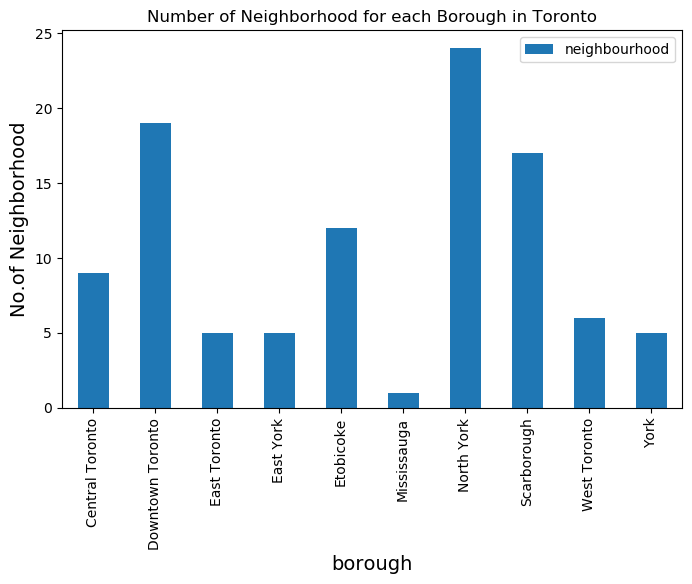

In [23]:
plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 14)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=14)
#giving a bar plot
df3.groupby('borough')['neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [24]:
df3.columns

Index(['postalcode', 'borough', 'neighbourhood', 'Postal Code', 'Latitude',
       'Longitude'],
      dtype='object')

In [25]:
df3.head()

,postalcode,borough,neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [26]:
df3.drop('postalcode',axis=1,inplace=True)

In [27]:
df3.head()
df3=df3[['Postal Code','borough','neighbourhood','Latitude','Longitude']]

In [28]:
# The total neighborhood list which contains indian restaurants in Toronto City
column_names=['borough', 'neighbourhood', 'ID','Name']
indian_rest_toronto=pd.DataFrame(columns=column_names)
count=1
for row in df3.values.tolist():
    Postalcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(df3),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_restaurants)))
    for restaurant_detail in indian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        indian_rest_toronto = indian_rest_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Indian Restaurants in Malvern, Rouge, Scarborough:0
( 2 / 103 ) Indian Restaurants in Rouge Hill, Port Union, Highland Creek, Scarborough:0
( 3 / 103 ) Indian Restaurants in Guildwood, Morningside, West Hill, Scarborough:0
( 4 / 103 ) Indian Restaurants in Woburn, Scarborough:1
( 5 / 103 ) Indian Restaurants in Cedarbrae, Scarborough:2
( 6 / 103 ) Indian Restaurants in Scarborough Village, Scarborough:0
( 7 / 103 ) Indian Restaurants in Kennedy Park, Ionview, East Birchmount Park, Scarborough:0
( 8 / 103 ) Indian Restaurants in Golden Mile, Clairlea, Oakridge, Scarborough:0
( 9 / 103 ) Indian Restaurants in Cliffside, Cliffcrest, Scarborough Village West, Scarborough:0
( 10 / 103 ) Indian Restaurants in Birch Cliff, Cliffside West, Scarborough:0
( 11 / 103 ) Indian Restaurants in Dorset Park, Wexford Heights, Scarborough Town Centre, Scarborough:2
( 12 / 103 ) Indian Restaurants in Wexford, Maryvale, Scarborough:1
( 13 / 103 ) Indian Restaurants in Agincourt, Scarborough:1


( 103 / 103 ) Indian Restaurants in Northwest, West Humber - Clairville, Etobicoke:0


In [29]:
df4=indian_rest_toronto

In [30]:
df4.columns

Index(['borough', 'neighbourhood', 'ID', 'Name', 'Borough', 'Neighborhood'], dtype='object')

In [31]:
df4.drop(['borough','neighbourhood'],axis=1)

,ID,Name,Borough,Neighborhood
0,4c632edeedd320a19ad5ae29,Bombay Palace,Scarborough,Woburn
1,4d6008f829ef236a8832a059,CANBE Foods Inc,Scarborough,Cedarbrae
2,4c77fc87bd346dcb8c90f0ef,La Sani Grill,Scarborough,Cedarbrae
3,5226562611d2cd49d83ef03b,Kairali,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town..."
4,4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town..."
5,4c27cddd9fb5d13a8cab9857,Patna Kebab House,Scarborough,"Wexford, Maryvale"
6,4d570727fb65236a7f600db4,Silver Spoon Pak-Indian Restaurant,Scarborough,Agincourt
7,4efccc9bb8f701ff611ce191,Nantha's Bakery,Scarborough,"Steeles West, L'Amoreaux West"
8,4b43dde2f964a52099ec25e3,Earth Indian Restaurant,North York,"Willowdale, Newtonbrook"
9,5c229362a0215b002cb89eb2,Butter Chicken Roti,North York,Don Mills


In [32]:
df4=df4[['Borough','Neighborhood','ID','Name']]#Dropping unwanted ID columns.

In [33]:
df4

,Borough,Neighborhood,ID,Name
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant
5,Scarborough,"Wexford, Maryvale",4c27cddd9fb5d13a8cab9857,Patna Kebab House
6,Scarborough,Agincourt,4d570727fb65236a7f600db4,Silver Spoon Pak-Indian Restaurant
7,Scarborough,"Steeles West, L'Amoreaux West",4efccc9bb8f701ff611ce191,Nantha's Bakery
8,North York,"Willowdale, Newtonbrook",4b43dde2f964a52099ec25e3,Earth Indian Restaurant
9,North York,Don Mills,5c229362a0215b002cb89eb2,Butter Chicken Roti


In [34]:
df4.shape

(49, 4)

In [35]:
df4.groupby('Borough')['ID'].count()

Borough
Central Toronto      5
Downtown Toronto     7
East Toronto        11
East York            6
Etobicoke            2
Mississauga          2
North York           3
Scarborough          8
West Toronto         4
York                 1
Name: ID, dtype: int64

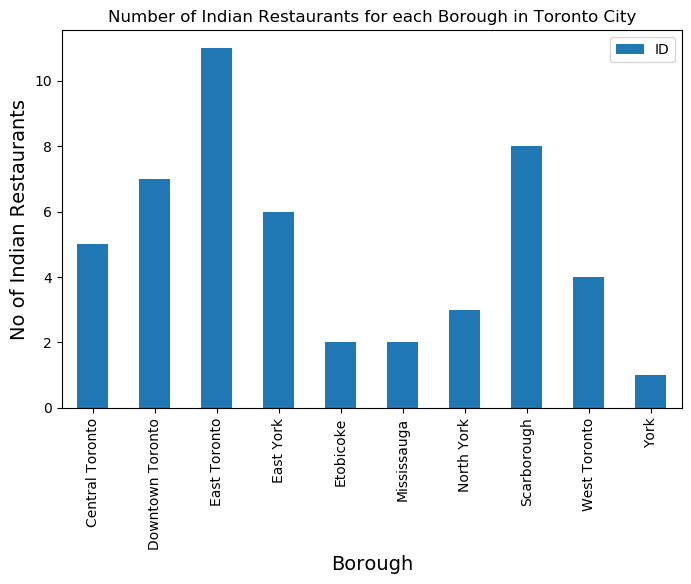

In [36]:
 # To know the maximum no of Indian Restaurant in each Borough we will plot the data grouping by Borough
plt.figure(figsize=(8,5), dpi = 100)
# Title
plt.title('Number of Indian Restaurants for each Borough in Toronto City')
# x-axis
plt.xlabel('Borough', fontsize = 14)
# y-axis
plt.ylabel('No of Indian Restaurants', fontsize=14)
#Creating bar plot
df4.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [37]:
# This shows that East Borough is having more Indian restuarants than any other Borough. York Borough has only one restaurant so chooisng York Borough may help the business.

In [38]:
#checking top 5 boroughs with most indian restuarants
Toronto_top_5_Neighbor = df4.groupby('Neighborhood')['ID'].count().nlargest(5).to_frame(name='Total')
Toronto_top_5_Neighbor=Toronto_top_5_Neighbor.reset_index()
Toronto_top_5_Neighbor.rename(index=str, columns={"index": "Neighborhood", "Total": "Total Indian Restaurant"}, inplace=True)
Toronto_top_5_Neighbor

,Neighborhood,Total Indian Restaurant
0,"India Bazaar, The Beaches West",8
1,Thorncliffe Park,4
2,Davisville,3
3,"Brockton, Parkdale Village, Exhibition Place",2
4,Canada Post Gateway Processing Centre,2


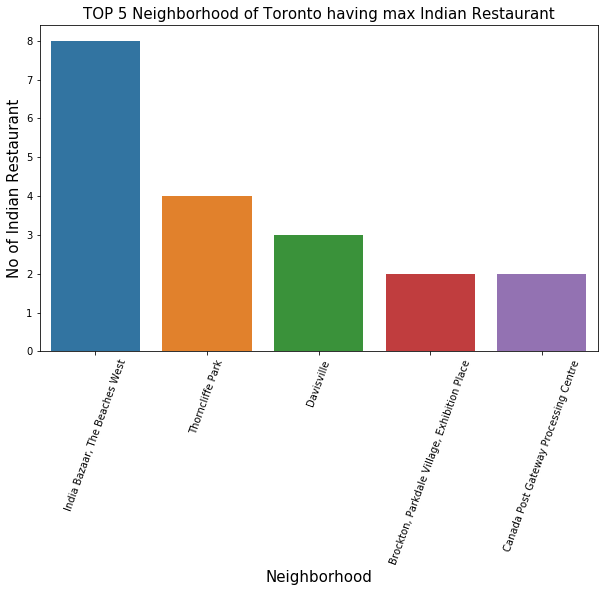

In [39]:
# We will Visualize the data in Bar Chart Graph
import seaborn as sns
fig = plt.figure(figsize=(10,6))
s=sns.barplot(x="Neighborhood", y="Total Indian Restaurant", data=Toronto_top_5_Neighbor)
s.set_xticklabels(s.get_xticklabels(), rotation=70)
plt.title('TOP 5 Neighborhood of Toronto having max Indian Restaurant', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("No of Indian Restaurant", fontsize=15)
plt.savefig("TOP_5_Neighborhood.png", dpi=300)
plt.show()

In [40]:
df4[df4['Neighborhood']=='India Bazaar, The Beaches West']

,Borough,Neighborhood,ID,Name
19,East Toronto,"India Bazaar, The Beaches West",4ae0c7a8f964a520638221e3,Udupi Palace
20,East Toronto,"India Bazaar, The Beaches West",4afc9816f964a520312422e3,Motimahal
21,East Toronto,"India Bazaar, The Beaches West",4bac30a2f964a52018ea3ae3,Bombay Chowpatty
22,East Toronto,"India Bazaar, The Beaches West",4ad9052cf964a520301721e3,Regency Restaurant
23,East Toronto,"India Bazaar, The Beaches West",4d8d278a1d06b1f712942a3b,Gautama
24,East Toronto,"India Bazaar, The Beaches West",4bbcc0efa0a0c9b60ebd1a0f,Haandi 2000
25,East Toronto,"India Bazaar, The Beaches West",4ae4c793f964a5201b9e21e3,The Famous Indian Restaurant
26,East Toronto,"India Bazaar, The Beaches West",4edd30c09adfe5cbe2818dc4,Lahori Taste & Burger House


In [41]:
CLIENT_ID = 'AGF2Q3KUMROMMCPR3VKROA2ETWWPUPJN34URCA0GZIB5X3ES' # your Foursquare ID
CLIENT_SECRET = 'S1UXOQXCG0JFBZTMTTHCBBC4XL4QPVTCJ3CD0K4POTM0Y45M' # your Foursquare Secret
LIMIT = 50
VERSION = '20200929' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AGF2Q3KUMROMMCPR3VKROA2ETWWPUPJN34URCA0GZIB5X3ES
CLIENT_SECRET:S1UXOQXCG0JFBZTMTTHCBBC4XL4QPVTCJ3CD0K4POTM0Y45M


In [42]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
toronto_venues = getNearbyVenues(names=df3['neighbourhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [68]:
"Italian Restaurant" in toronto_venues['Venue Category'].unique()

True

In [69]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1666, 254)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 254)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
ita = to_grouped[["Neighborhoods","Italian Restaurant"]]
ita.head() #.head() shows the first five rows only

,Neighborhoods,Italian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.090909


In [73]:
ita = ita.rename(columns={'Neighborhoods':'Neighborhood'})

In [74]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = ita.drop(['Neighborhood'], axis=1)

In [75]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 1, 2, 0, 2, 0, 0])

In [76]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [77]:
scores = [get_inertia(x) for x in range(2, 21)]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  This is separate fro

Text(0, 0.5, 'Error')

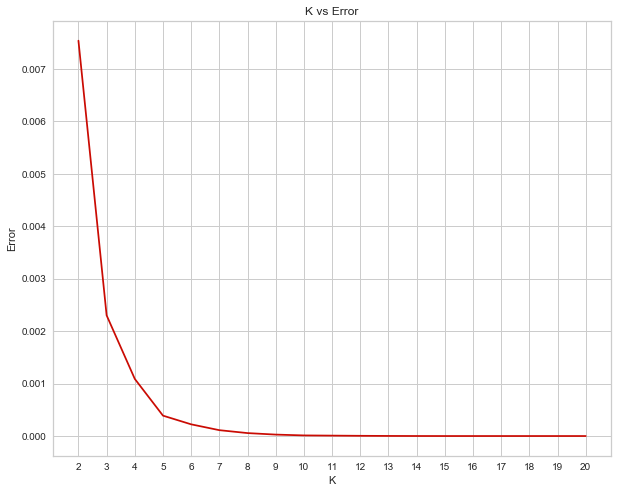

In [78]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

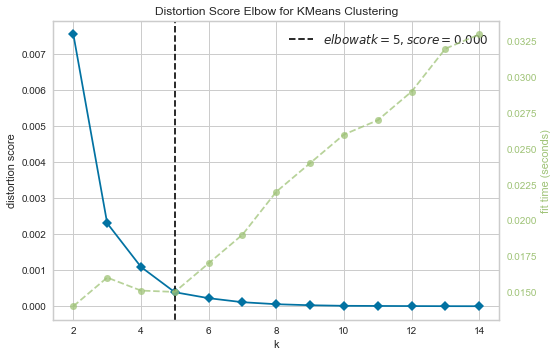

In [97]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [98]:

kclusters = 5

toronto_grouped_clustering = ita.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 4, 3, 0, 1, 0, 0])

In [99]:

# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = ita.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [100]:
to_merged.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.000000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.090909,4


In [101]:
ita["Cluster Labels"] = kmeans.labels_
ita.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.000000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.090909,4


In [103]:
# How many neighborhoods in each cluster
ita['Cluster Labels'].value_counts()

0    74
3     7
1     7
2     6
4     2
Name: Cluster Labels, dtype: int64

In [104]:
df_new = df3[['borough', 'neighbourhood']]
df_new.head()

,borough,neighbourhood
0,Scarborough,"Malvern, Rouge"
1,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,Scarborough,"Guildwood, Morningside, West Hill"
3,Scarborough,Woburn
4,Scarborough,Cedarbrae


In [107]:

to_merged.columns

Index(['Neighborhood', 'Italian Restaurant', 'Cluster Labels'], dtype='object')

In [118]:
to_merged.rename(columns={'Neighborhood':'neighbourhood'},inplace=True)

In [119]:
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
cluster1

,neighbourhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.0,0
1,"Alderwood, Long Branch",0.0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0
3,Bayview Village,0.0,0
6,"Birch Cliff, Cliffside West",0.0,0
...,...,...,...
91,"Willowdale, Willowdale West",0.0,0
92,Woburn,0.0,0
93,Woodbine Heights,0.0,0
94,York Mills West,0.0,0


In [120]:
df_new.columns

Index(['borough', 'neighbourhood'], dtype='object')

In [121]:
cluster1.rename(columns={'Neighborhood':'neighbourhood'},inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [135]:
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='neighbourhood')
df_cluster1.head()

,borough,neighbourhood,Italian Restaurant,Cluster Labels
0,Scarborough,"Malvern, Rouge",0.0,0
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",0.0,0
2,Scarborough,"Guildwood, Morningside, West Hill",0.0,0
3,Scarborough,Woburn,0.0,0
4,Scarborough,Cedarbrae,0.0,0


In [125]:
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='neighbourhood')
df_cluster2

,borough,neighbourhood,Italian Restaurant,Cluster Labels
0,North York,Don Mills,0.043478,1
1,North York,Don Mills,0.043478,1
2,Downtown Toronto,"St. James Town, Cabbagetown",0.040816,1
3,Downtown Toronto,"Garden District, Ryerson",0.040000,1
4,Downtown Toronto,Central Bay Street,0.040000,1
5,Downtown Toronto,Stn A PO Boxes,0.040000,1
6,West Toronto,"Brockton, Parkdale Village, Exhibition Place",0.043478,1
7,West Toronto,"High Park, The Junction South",0.040000,1


In [127]:
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='neighbourhood')
df_cluster3

,borough,neighbourhood,Italian Restaurant,Cluster Labels
0,East Toronto,"The Danforth West, Riverdale",0.069767,2
1,East Toronto,"India Bazaar, The Beaches West",0.052632,2
2,Central Toronto,Davisville,0.060606,2
3,Downtown Toronto,Christie,0.062500,2
4,West Toronto,"Parkdale, Roncesvalles",0.071429,2
5,West Toronto,"Runnymede, Swansea",0.060606,2


In [128]:
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='neighbourhood')
df_cluster4

,borough,neighbourhood,Italian Restaurant,Cluster Labels
0,East Toronto,Studio District,0.027027,3
1,Downtown Toronto,St. James Town,0.020000,3
2,Downtown Toronto,Berczy Park,0.020000,3
3,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",0.020000,3
4,Downtown Toronto,"University of Toronto, Harbord",0.029412,3
5,West Toronto,"Little Portugal, Trinity",0.022222,3
6,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,3


In [129]:
cluster5=to_merged.loc[to_merged['Cluster Labels'] == 4]
df_cluster5 = pd.merge(df_new, cluster4, on='neighbourhood')
df_cluster5

,borough,neighbourhood,Italian Restaurant,Cluster Labels
0,East Toronto,Studio District,0.027027,3
1,Downtown Toronto,St. James Town,0.020000,3
2,Downtown Toronto,Berczy Park,0.020000,3
3,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",0.020000,3
4,Downtown Toronto,"University of Toronto, Harbord",0.029412,3
5,West Toronto,"Little Portugal, Trinity",0.022222,3
6,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,3


In [132]:
df3['borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

# Coclusions
- Upon forming the clusters we see East Torronto and Downtown Torronto are having most of the restaurants , this was verified using Indian Restaurants and Iatalian restaurants.<br>
- if you are afoodie Downtown Torronto and East Torronto will be the right places.
- if you want to start a new restaurant York County will be best as it has very less restuarants.
- Scarborough is  a nice place to live with many neighbourhoods but there are very few restaurants so investing here would be a good choice.



In [136]:
pwd

'C:\\Users\\mchee\\Downloads\\IBM-DS-capstone-master\\IBM-DS-capstone-master'